In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_labels)
print(test_labels) 
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)   

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

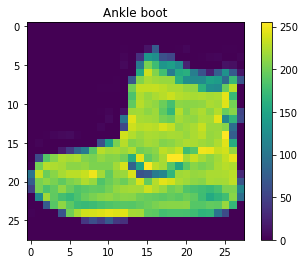

In [5]:
for i in range(1):
    n=train_labels[i]
    name =class_names[n]
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.title(name)
    plt.show()

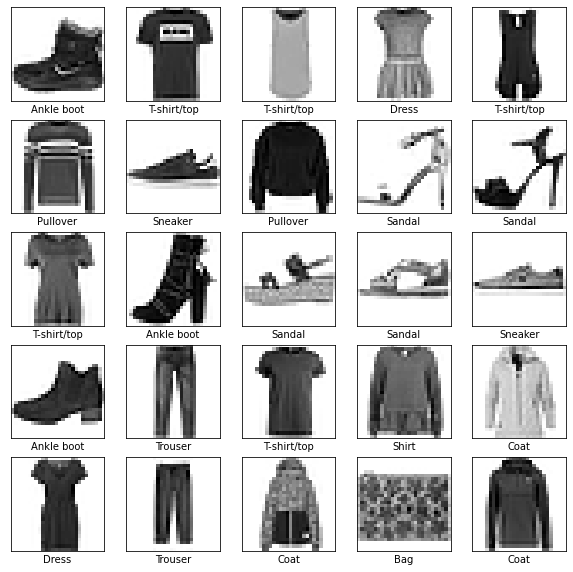

In [47]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
model = keras.Sequential(
[
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(256, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4834 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3679 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3282 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3059 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2872 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2429 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.231

313/313 [==============================] - 0s 1ms/step
[3.8723770e-06 1.6722988e-06 2.5521405e-08 1.3391773e-09 5.1323877e-07
 1.6605611e-04 7.3504318e-09 6.6030167e-02 1.2924835e-07 9.3379760e-01]
9
9


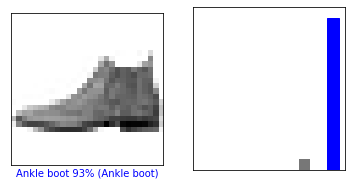

In [50]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

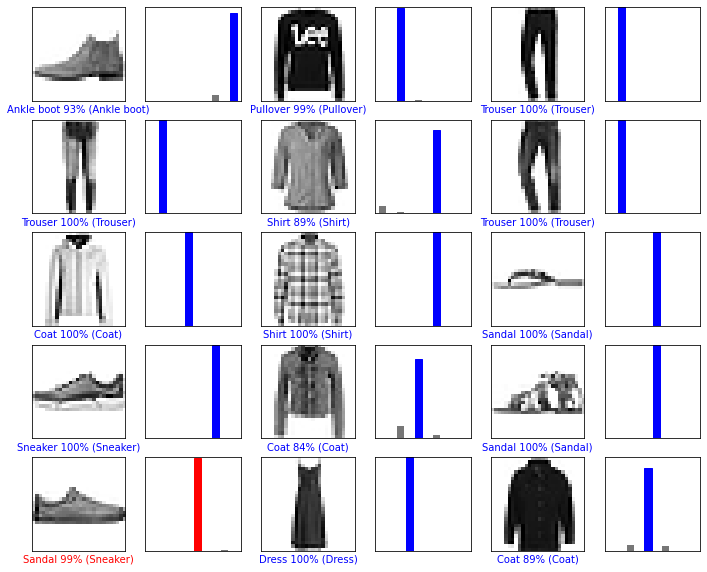

In [51]:
# 可视化结果
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
1/1 [==============================] - 0s 15ms/step
[[3.8723765e-06 1.6723018e-06 2.5521404e-08 1.3391772e-09 5.1323917e-07
  1.6605623e-04 7.3504309e-09 6.6030286e-02 1.2924845e-07 9.3379748e-01]]


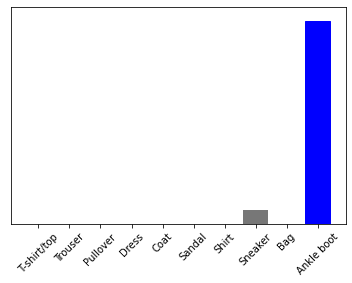

In [52]:
img = test_images[0]

img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images2=train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
train_images2.shape

(60000, 784)

In [54]:
train_images2=train_images2[0:1000]
train_labels=train_labels[0:1000]

In [55]:
def model_RandomForest(Xtrain,Ytrain,is_optimize=1):
    """
    训练随机森林
    """
    RandomForest = RandomForestClassifier()
    if is_optimize==1:
        param_grid_Log_RegRandomForest = [{"n_estimators":list(range(50,100,10)),"max_depth":list(range(3,10)),"min_samples_split":list(range(100,500,50))}]
        score = make_scorer(accuracy_score)
        param_grid = {"n_estimators":[500,800,1000],"max_depth":[8,9,10]}
        RandomForest = GridSearchCV(RandomForest,param_grid_Log_RegRandomForest,cv=3)
    RandomForest = RandomForest.fit(train_images2, train_labels)
    return RandomForest
def trainmodel_RF(x_train_stand,y_train):
    """
    目的：训练模型，随机森林
    x_train_stand：训练集输入，
    y_train：训练集标签，与输入相对应
    """
    #训练模型
    print("随机森林训练中")
    RandomForest = model_RandomForest(trainmodel_RF, train_labels)

    with open("/model/RandomForestModel50.pickle","wb") as pickle_file:
        pickle.dump(RandomForest,pickle_file)   #随机森林的拟合模型

    Str = "随机森林训练完成"
    return print(Str)

In [56]:
trainmodel_RF(train_images2,train_labels)

随机森林训练中
随机森林训练完成


In [57]:
test_images2=test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
test_images2.shape

(10000, 784)

In [58]:
with open("/model/RandomForestModel50.pickle","rb") as pickle_file:
    RandomForest = pickle.load(pickle_file)   #随机森林的拟合模型

In [59]:
#RandomForest.predict(test_images2)
RandomForest.predict_proba(test_images2)[0]

array([5.54110046e-03, 2.45205261e-03, 2.10085802e-03, 1.29298018e-02,
       4.85215400e-04, 1.69015180e-01, 7.05833496e-03, 1.68708993e-01,
       9.88269361e-02, 5.32881527e-01])

In [60]:
print("随机森林准确率: {:.3f}".format(accuracy_score(test_labels,RandomForest.predict(test_images2))))

随机森林准确率: 0.741


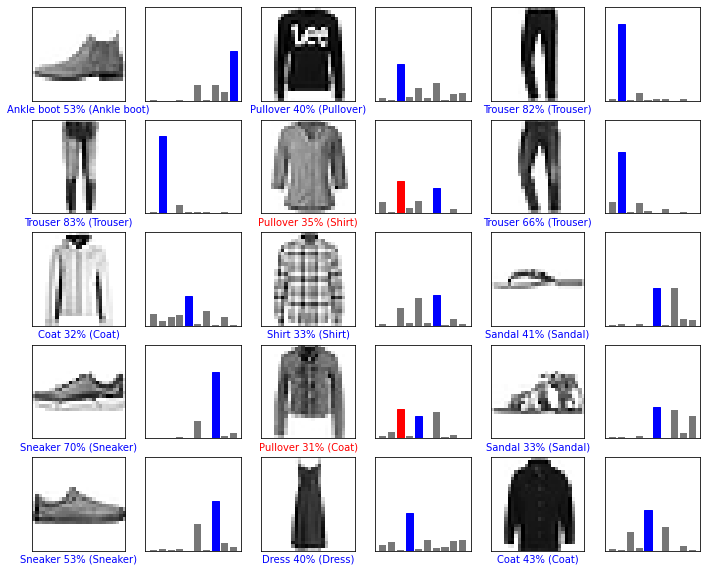

In [61]:
predictions_pro=RandomForest.predict_proba(test_images2)

# 可视化结果
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_pro, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_pro, test_labels)
plt.show()